In [102]:
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
import glob
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import re

In [10]:
data_path = "../screenshots/"
images = glob.glob(data_path+'lcs*.png')

In [76]:
def show_img(img, gray=False):
    plt.figure(figsize=(10,10))
    if (gray):
        plt.imshow(img, 'gray')
    else:
        plt.imshow(img)

In [14]:
print(images)

['../screenshots/lcs3.png', '../screenshots/lcs2.png', '../screenshots/lcs0.png', '../screenshots/lcs1.png', '../screenshots/lcs4.png']


In [15]:
curr_img = images[3]

In [16]:
img = cv2.imread(curr_img)

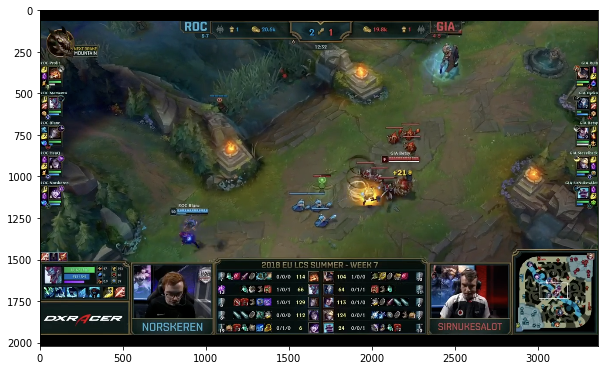

In [17]:
# convert image to RGB color for matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# show image with matplotlib
plt.figure(figsize=(10,10))
plt.imshow(img)

In [61]:
def crop_scoreboard(img):
    return img[1560:1945,1060:2310]

def get_team1_scores(scoreboard):
    return scoreboard[:, 350:550]

def get_team2_scores(scoreboard):
    return scoreboard[:, 715:910]

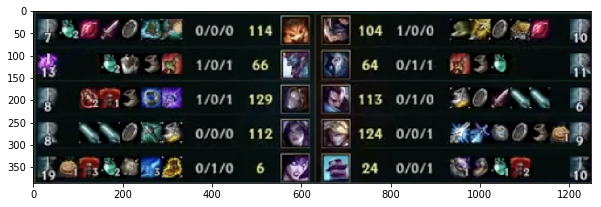

In [95]:
scoreboard = crop_scoreboard(img)
# show_img(scoreboard)
team1 = get_team1_scores(scoreboard)
# show_img(team1)
team2 = get_team2_scores(scoreboard)
# show_img(team2)

In [120]:
def invert_img(img):
    return cv2.bitwise_not(img)

def greyscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def binary_threshold(img):
    _,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    return thresh

def thicken(img):
    return cv2.medianBlur(img,3)

def get_scores(scores_img, side=None):
    delimiters=' /'
    regex = "[{0}]+".format(delimiters)
    invert = invert_img(scores_img)
    thresh = binary_threshold(invert)
    thick = thicken(thresh)
    text = pytesseract.image_to_string(thick, config="-c tessedit_char_whitelist=/0123456789 -psm 6")
    players = text.split('\n')
    player_score = [[int(val) for val in re.split(regex, player_txt)] for player_txt in players]
    if side == 'right':
        player_score = [player[1:] +[player[0]] for player in player_score]
    return player_score
        

def get_curr_scores(scoreboard):
    team1, team2 = get_team1_scores(scoreboard), get_team2_scores(scoreboard)
    return {'left': get_scores(team1, 'left'), 'right': get_scores(team2, 'right')}

In [121]:
print(get_curr_scores(scoreboard))

{'left': [[0, 0, 0, 114], [1, 0, 1, 66], [1, 0, 1, 129], [0, 0, 0, 112], [0, 1, 0, 6]], 'right': [[1, 0, 0, 104], [0, 1, 1, 64], [0, 1, 0, 113], [0, 0, 1, 124], [0, 0, 1, 24]]}


2018 NA LCS SUMMER - WEEK 6
£77112} (96.3] MN 83 [E W 51 0/0/2 :30‘314f77'} ﬁ
% ha 0/2/0 53 [7 §[ 51 2mm «Qikti 132'
3 398.6 0/o/o 106 '7 m 93 1mm B‘BQ“; g
f 77:3 69"»; wow 92 W W 105 MM Ilﬁﬂé 7715
‘4' "ﬂag 0/1/0 12 [W ﬁ 15 now 502.35) T ‘
